In [1]:
# import relevant libraries here 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.tsa.stattools import acf

### Understanding the components of Time Series Data set

First, you'll simulate a time series dataset. This will help us better understand the components of a time series and the concepts underlying time series analysis and grok, so to speak, the steps that go into modeling time series using a generative modeling approach. In other words, given the time series plotted below, our goal is the build a data set that is most similar to the one below.

<img src="images/simulated_dataset.png" alt="drawing" style="width:800px;"/>

Use your understanding of how seasonality trend and noise interact in a time series to generate data set similar to the one above.
The information that you need to reproduce this dataset is provided below:

* The data contains 200 months worth of data

* The trend is an exponential function: 

$$y = (1.5^{(\frac{\sqrt(x)}{2})}) $$

* The seasonality in this dataset is quarterly (frequency of 4 months)
and is a sine curve with an amplitude of 1.2

* The noise is Gaussian with a mean of $\mu=0$ and $\sigma=1$  

1. Compute and plot each of the components of your time series independently.

* Plot your dta to verify your solutiojn. Your plots should look like the following:

<img src="images/three_plots.png" alt="drawing" style="width:500px;"/>

2. Generate the time series by combining the three components. 

Important: use the following seed so that graph matches the one above exactly. 

```
np.random.seed(42)
```

In [2]:
# write  your code for simulating the trend
def func_exp(x):
    return 1.5**(x**(0.5)/2)

In [3]:
# import math

# def func_exp(x):
#     vals = []
#     for _ in x:
#         vals.append(1.5**(math.sqrt(_)/2))
#     return vals

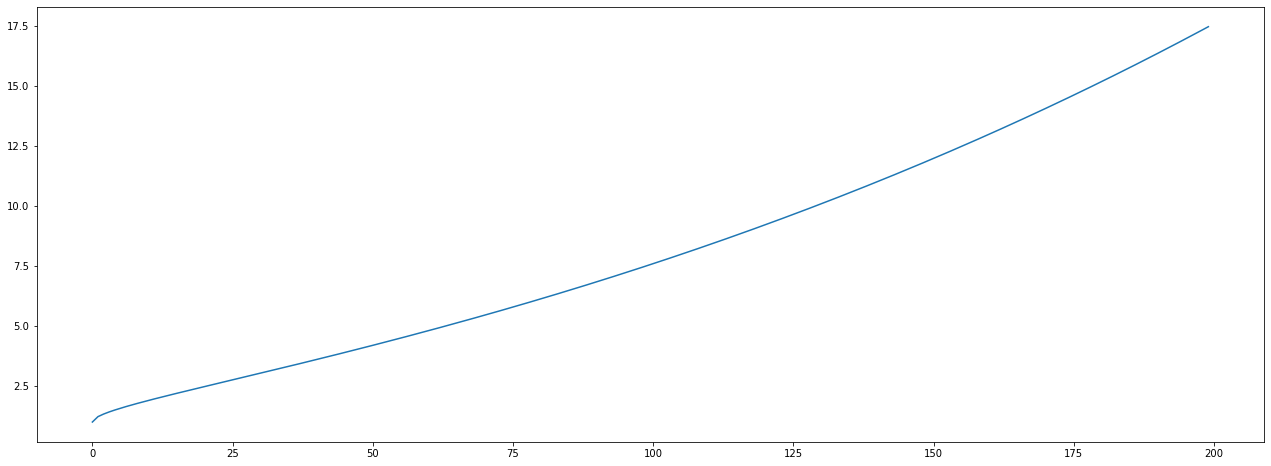

In [4]:
# plot your trend 
plt.figure(figsize=(22,8))

x = np.arange(0,200)
plt.plot(x, func_exp(x))

In [5]:
# write  your code for simulating the seasonality
def seasonality(x, amp, freq):
    frequency = 2 * np.pi / freq
    return amp * np.sin(frequency * x)

seasonal = []
x = np.arange(0, 12.1, 0.1)

seasonal = seasonality(x, 1.2, 4)

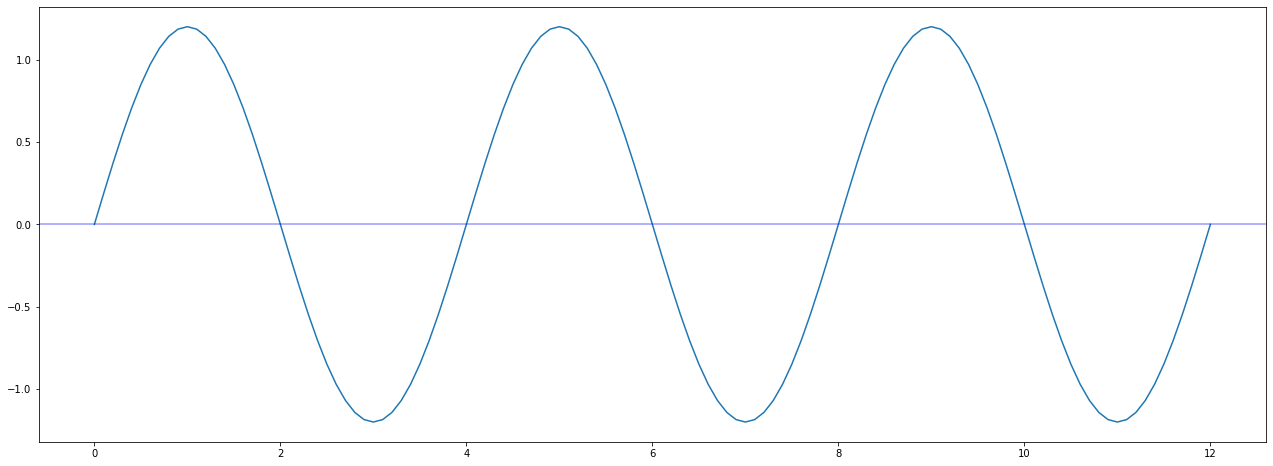

In [6]:
# plot your seasonality 
plt.figure(figsize=(22,8))

plt.plot(x, seasonal)
plt.axhline(y=0, linewidth=2, color='blue', alpha=.3)

In [7]:
# write  your code for simulating the noise 
np.random.seed(42)

x = np.arange(0, 200)

noise_arr = np.random.normal(0,1,200)

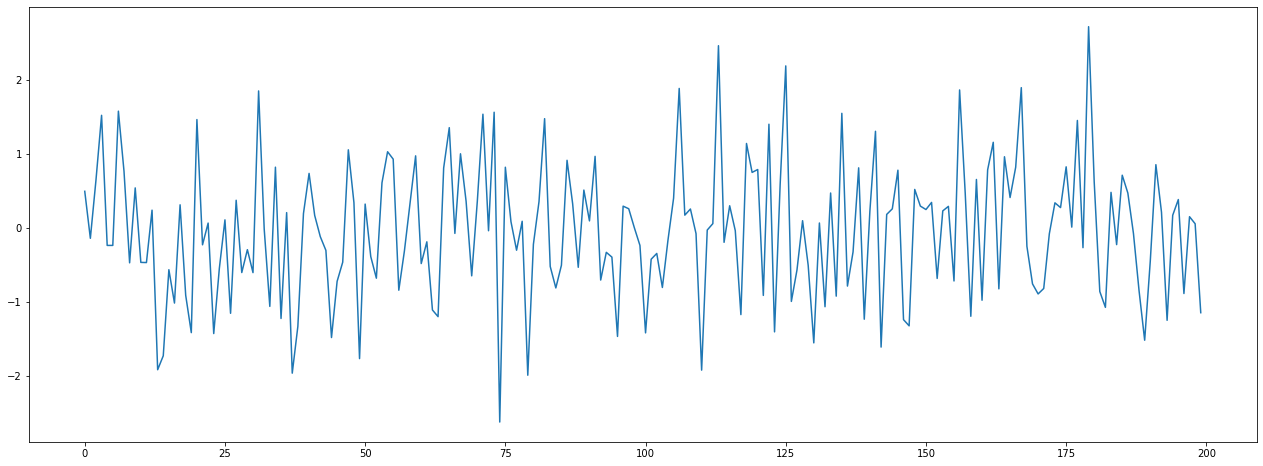

In [8]:
# plot your random noise
plt.figure(figsize=(22,8))

plt.plot(x, noise_arr)

* Compute and plot your combined signal. The resulting graph should look (approximately) like the following.
<img src="images/final_timeseries.png" alt="drawing" width="600px"/>



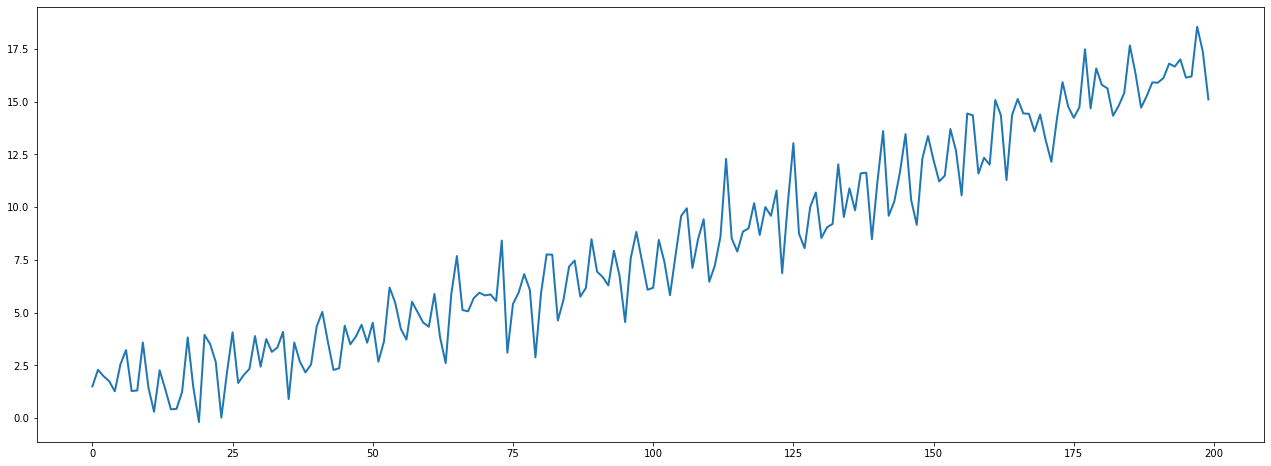

In [9]:
# Write you code here
plt.figure(figsize=(22,8))

x = np.arange(0, 200)

seasonal = []
seasonal = seasonality(x, 1.2, 4)

plt.plot(x, func_exp(x) + seasonal + noise_arr, linewidth=2)


4. Compute the autocorrelation for the 20 first lags and observe that lags  4, 8, 12, 15 represent the 1st, 2nd, 3rd, and 4th highest lags, respectively. 
Your graph should be similar to the graph below.

<img src="images/acf_simulated.png" alt="drawing" style="width:500px;"/>

D:\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


(-1.0, 18.0)

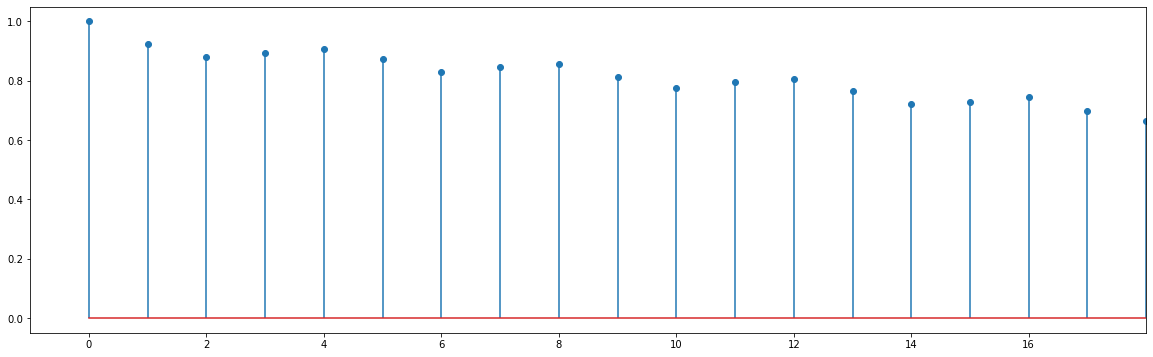

In [10]:
# Write your code here
plt.figure(figsize=(20,6))

acv_v_noise = acf(func_exp(x) + seasonal + noise_arr,  nlags=20)
plt.stem(np.arange(len(acv_v_noise)), acv_v_noise)
plt.xticks(np.arange(0,17,2))
plt.xlim(-1,18)

What does the graph above tell you about the trend in the data?  How would you explain it to a colleague who is not familiar with the ACF plots nor how they can be used to assess whether there is a trend in the data?

# Write your answer here
From this ACF plot, we can see that there is indeed a trend in this timeseries data, with seasonality. In other words, this data taken over the course of 200 months indeed appears to exhibit a trend in rise and fall of values that follows a quarterly (seasonal) basis. This can be seen by the distinct cresting and waning of the stems, they steadily drop after 0, rise to a peak (lag), drop to another low, then rise again to another peak (lag), repeating the cycle.

* While the example above focused on a single sine wave with an amplitude of  1.2 and a frequency of 4 months. Real-time series often have other embedded signals. for instance, in addition to a quarterly seasonality, the data may contain a less robust monthly sign 


* A weaker monthly signal means that:
    1. The signal has a weaker (smaller amplitude). Let's assume the amplitude here is 0.3
    2. The signal's frequency is one month

* Plot the second harmonic based on the information above. Include the first harmonic signal as a reference. Your plot should look like the following.

<img src="images/harmonic_example.png" alt="drawing" style="width:800px;"/>

* Do not forget to label the lines

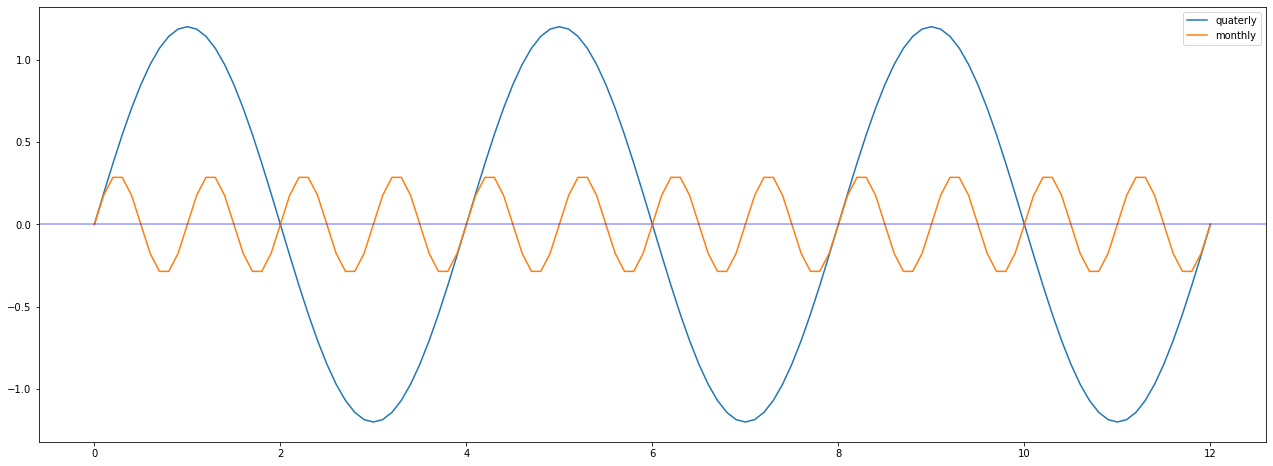

In [11]:
#### Write your code here
seasonal = []
x = np.arange(0, 12.1, 0.1)

quarterly = seasonality(x, 1.2, 3)

monthly = seasonality(x, 0.3, 1)

plt.figure(figsize=(22,8))

plt.plot(x, quarterly, label='quaterly')
plt.plot(x, monthly, label='monthly')
plt.axhline(y=0, linewidth=2, color='blue', alpha=.3)
plt.legend()

Plot the full seasonality, which includes the first and the second harmonics. Your plot should look like the following.

<img src="images/combined_sines.png" alt="drawing" style="width:900px;"/>

In [12]:
seasons = quarterly + monthly

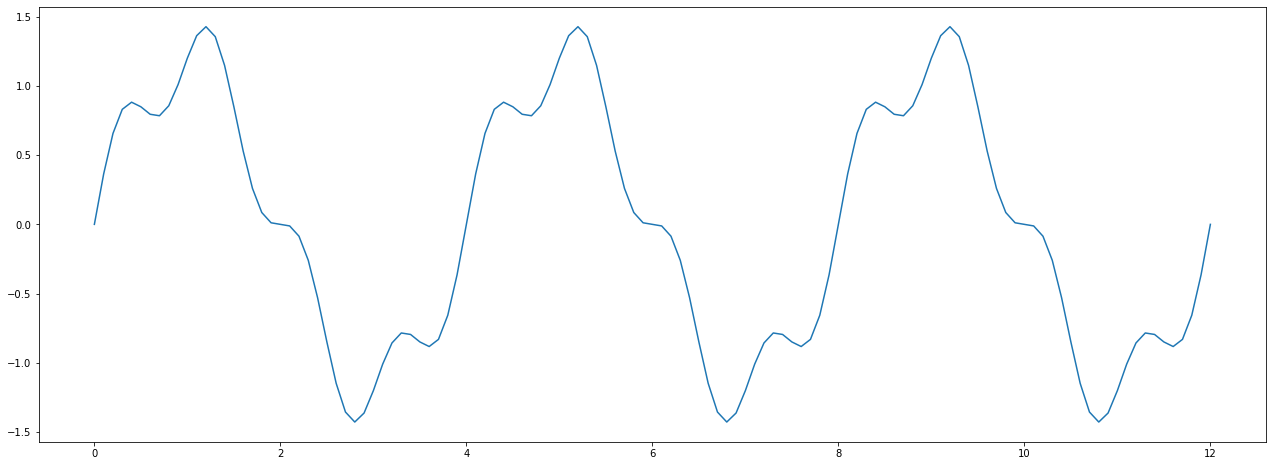

In [13]:
plt.figure(figsize=(22,8))

plt.plot(x, seasons)

2. Generate the new time series, which includes the trend, both signal, and the stochastic noise. Your final results should look like the following

<img src="images/signal_with_monthly.png" alt="drawing" style="width:800px;"/>




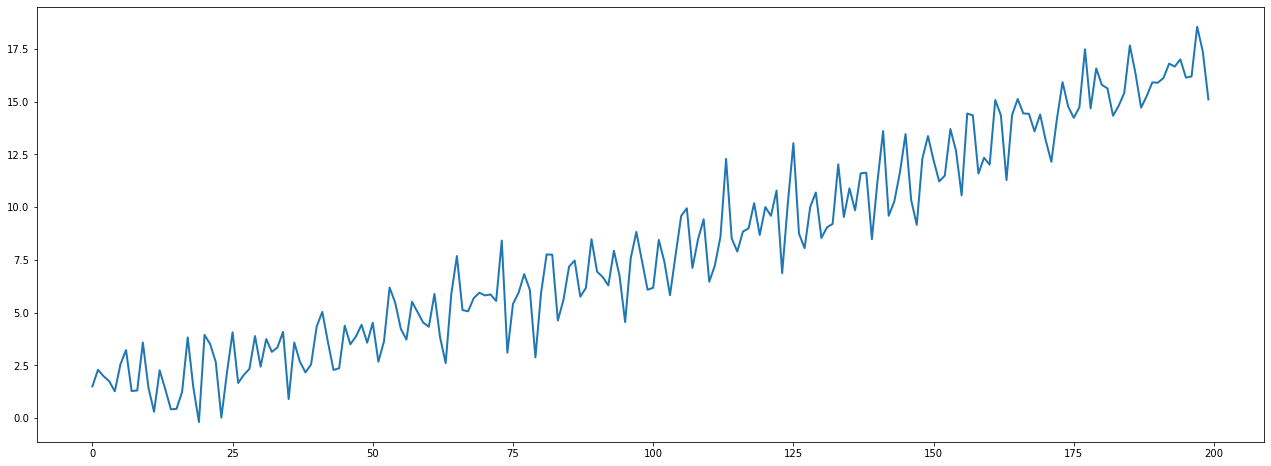

In [14]:
# Write you code here
plt.figure(figsize=(22,8))

x = np.arange(0, 200)

quarterly = seasonality(x, 1.2, 3)

monthly = seasonality(x, 0.3, 1)

seasons = quarterly + monthly

plt.plot(x, func_exp(x) + seasons + noise_arr, linewidth=2)

### Question 2: time Series Modeling of Passenger Count for Internationals Departing from LAX

Initially, the approach used here will be very similar to that used above. We will show that not all that looks seasonal can be easily fitted using a line but can be forecasted using triple exponential smoothing instead. 


We will be using a dataset reporting the Los Angeles International Airport Passenger Traffic By Terminal. The data is in the file `data/LAX_final.csv`  and is formatted as a CSV (comma-separated values). The dataset contains multiple fields, but we are only interested in modeling the international departures for LAX between 2009 and 2017. 

Load the data as a pandas DataFrame and used `head()` to make sure the data was read correctly. 

Name you `DataFrame`  as `lax`


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.tsa.stattools import acf
from scipy.optimize import curve_fit

In [16]:
# Write you code here

lax = pd.read_csv("data/LAX_final.csv", infer_datetime_format=True, keep_date_col=True, parse_dates=['ReportPeriod'])
# lax = pd.read_csv("data/LAX_final.csv")
lax.head()

,ReportPeriod,Terminal,Arrival_Departure,Domestic_International,Passenger_Count
0,2006-01-01,Imperial Terminal,Arrival,Domestic,490
1,2006-01-01,Imperial Terminal,Departure,Domestic,498
2,2006-01-01,Misc. Terminal,Arrival,Domestic,753
3,2006-01-01,Misc. Terminal,Departure,Domestic,688
4,2006-01-01,Terminal 1,Arrival,Domestic,401535


In [17]:
type(lax['ReportPeriod'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
# start = lax['ReportPeriod'] >= "01/01/2006"
# end = lax['ReportPeriod'] < "01/01/2019"
# lax = lax.loc[start & end]
# lax.head()

We are only interested in values associated with international departures. Write an expression to retain only lines where "Arrival_Departure" is equal to "Departure" and "Domestic_International" is equivalent to "International."
 
We are also only interested in the columns `ReportPeriod` (i.e., the period covered) and the `Passenger_Count`, the number of passengers reported during that period. 
Create a new  `DataFrame`  (`Lax_int_dep`) which contains only these two columns and only international departures. 






In [19]:
# Write you code here
arr_dept = lax['Arrival_Departure'] == 'Departure'
inter = lax['Domestic_International'] == 'International'

Lax_int_dep = lax.loc[arr_dept & inter]
Lax_int_dep = Lax_int_dep[['ReportPeriod', 'Passenger_Count']]
Lax_int_dep

,ReportPeriod,Passenger_Count
6,2006-01-01,561
10,2006-01-01,156751
14,2006-01-01,60948
18,2006-01-01,42256
22,2006-01-01,25531
...,...,...
5776,2019-01-01,449
5780,2019-01-01,93808
5784,2019-01-01,38852
5788,2019-01-01,3054


Compute the total number of passengers (`Passenger_Count`) per month. 
Call your new DataFrame `lax_totals`. Use the shape attribute to make sure that your resulting DataFrame matches the expected results --  recall that the data have reported values for January 2006 through January 2019.


In [20]:
# Write you code here
lax_totals = pd.DataFrame(Lax_int_dep.groupby(['ReportPeriod'])['Passenger_Count'].sum())
lax_totals

,Passenger_Count
ReportPeriod,
2006-01-01,695800
2006-02-01,600008
2006-03-01,680319
2006-04-01,672268
2006-05-01,723954
...,...
2018-09-01,1046930
2018-10-01,1083831
2018-11-01,1000529


Recall that changing the index of the time series dataset simplifies the analysis.  Change the type of your index DataTime Index. Set the frequency of your observations to month start (`MS`).

# Answer

Already turned ReportPeriod into DateTime Index using parameters of read_csv when loading in data and it is not monthly after the groupby operation.

The reporting reported includes the financial crisis of 2007-2009 https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008. 

According to news reports, travel in 2009 was ["ravaged"](https://skift.com/2018/09/14/10-years-later-how-the-travel-industry-came-back-from-the-financial-crisis/)

Plot the data and see for yourself that the number right before 2009 are significantly lower than during the 2006-2008 period. Your plot should look like the following.


<img src="images/lax_complete.png" alt="drawing" style="width:800px;"/>


Hint: If your data does not look like the following, then check that your DataFrame `index`  **makes sense**


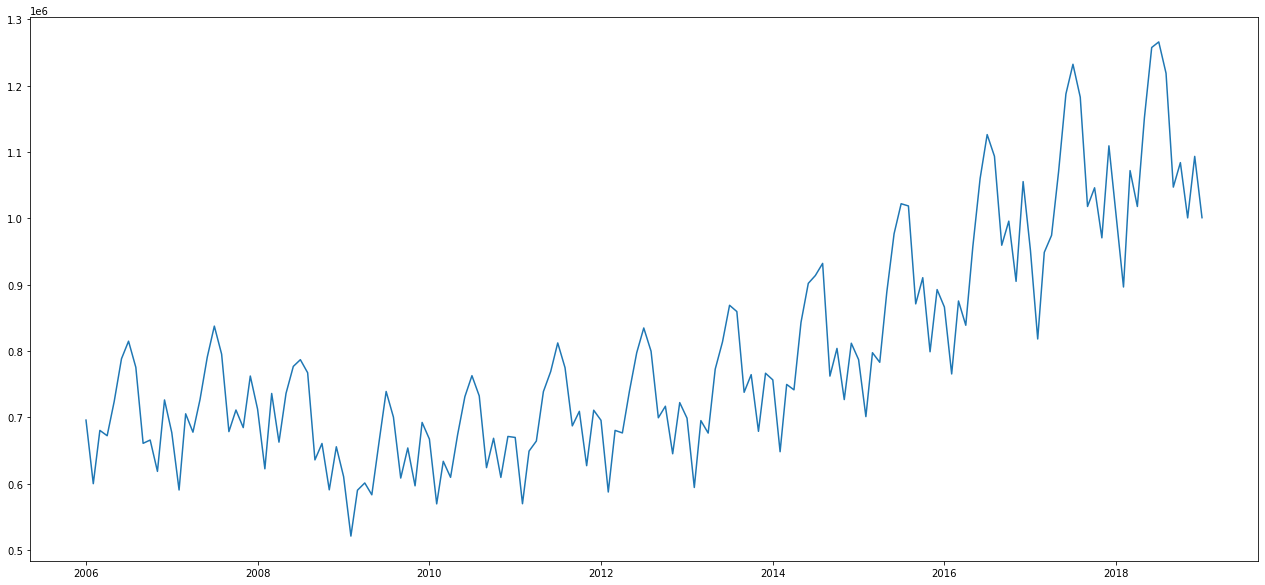

In [21]:
# Write your code here
plt.figure(figsize=(22,10))

plt.plot(lax_totals.index, lax_totals['Passenger_Count'])

It would be reasonable to remove data before the 2009 financial crisis so that the model is not affected by this `rare` anomaly. Build a new `DataFrame` and call it `lax_totals_post_08`. Use `shape` to make sure the data contains the expected number of entries. It should contain 12 entries for each of the years 2009 through 2018. Plus January 2019.

In [22]:
# Write your code here

start = lax_totals.index >= "01/01/2009"
end = lax_totals.index <= "01/01/2019"
lax_totals_post_08 = lax_totals.loc[start & end]

Plot the data to make sure the data does not contain the dip associated with 2008.

Your graph should look like the following:


<img src="images/lax_totals_post_08.png" alt="drawing" style="width:800px;"/>


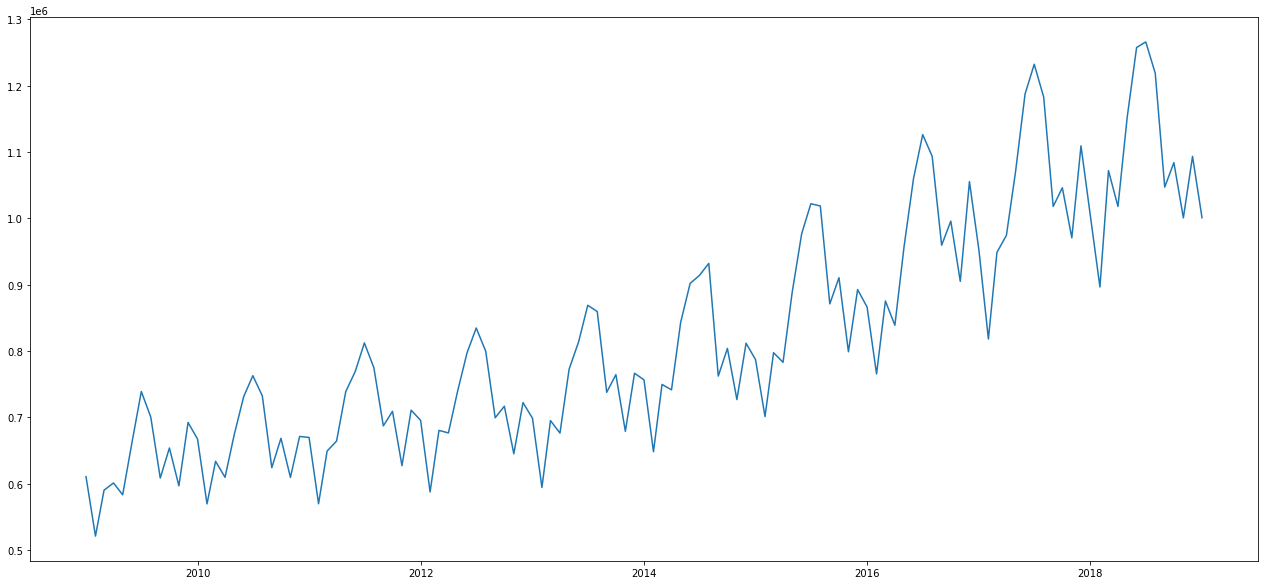

In [23]:
# Write your code here

plt.figure(figsize=(22,10))

plt.plot(lax_totals_post_08.index, lax_totals_post_08['Passenger_Count'])

* The dataset exhibits clear trends and seasonality. We will tackle the modeling of the trend prior to "attempting" to model the seasonality.

* Find the best fitting trend line and use it to detrend the data. You can achieve this by using the same strategy as that covered in class. Specifically,  you need to approximate the data using a power function $y = a x^b$, where are $a$ and $b$ are the constants you need to find.
  * use the `curve_fit` from the scipy.optimize module  to find the curve that best matches `lax_totals_post_08`
  

* Plot your best fitting trend as well as your data. Your graph should look like the following.


<img src="images/trend.png" alt="drawing" style="width:900px;"/>


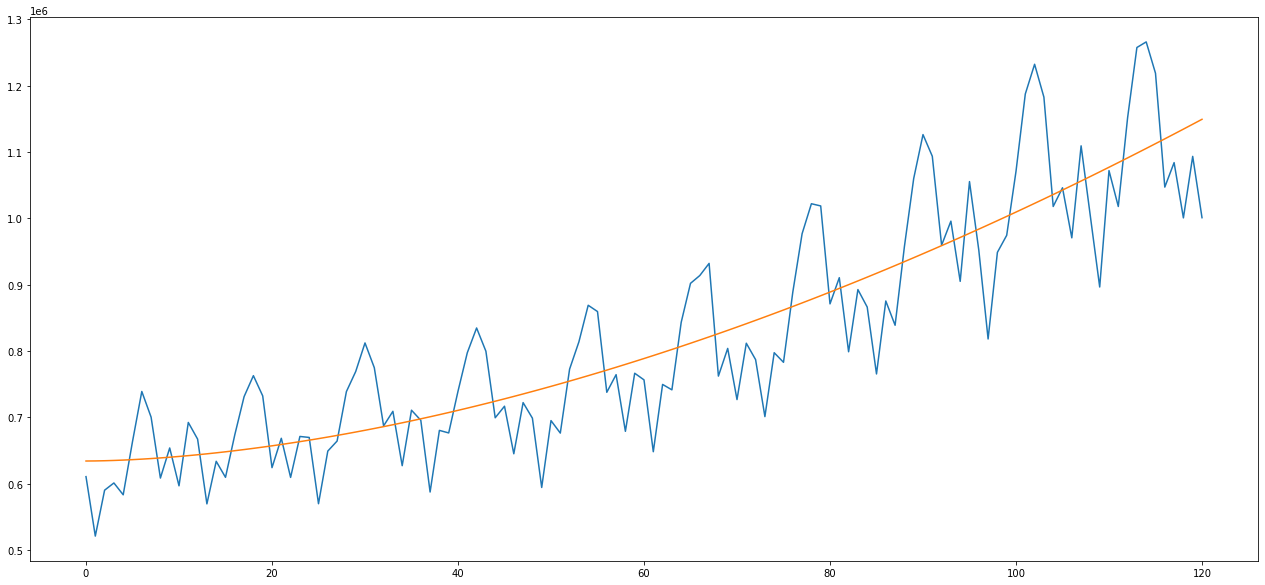

In [24]:
# Write your code here
x_axe = np.arange(0, len(lax_totals_post_08['Passenger_Count']))

def power_func(x, a, b, c):
    return a*(x**b) + c

popt, pcov  = curve_fit(power_func, x_axe, lax_totals_post_08['Passenger_Count'])
a,b,c = popt

x_axe = np.arange(0, len(lax_totals_post_08.index))
y = power_func(x_axe, a,b,c)

plt.figure(figsize=(22,10))

plt.plot(x_axe, lax_totals_post_08['Passenger_Count'])
plt.plot(x_axe, y)

* In what follows we are going to "try" to identify the seasonality in the data. The approach we will use is similar to that followed in class and above.

* Detrend your data; i.e., Remove the trend so that seasonality is easier to observe. call the detrended data lax_totals_post_08_detrd

* Plot your data to make sure the data is detrended. Your graph should look like the following
  * Plot a horizontal line at y=0 to highlight the seasonality
    
    
<img src="images/detrended.png" alt="drawing" style="width:800px;"/>



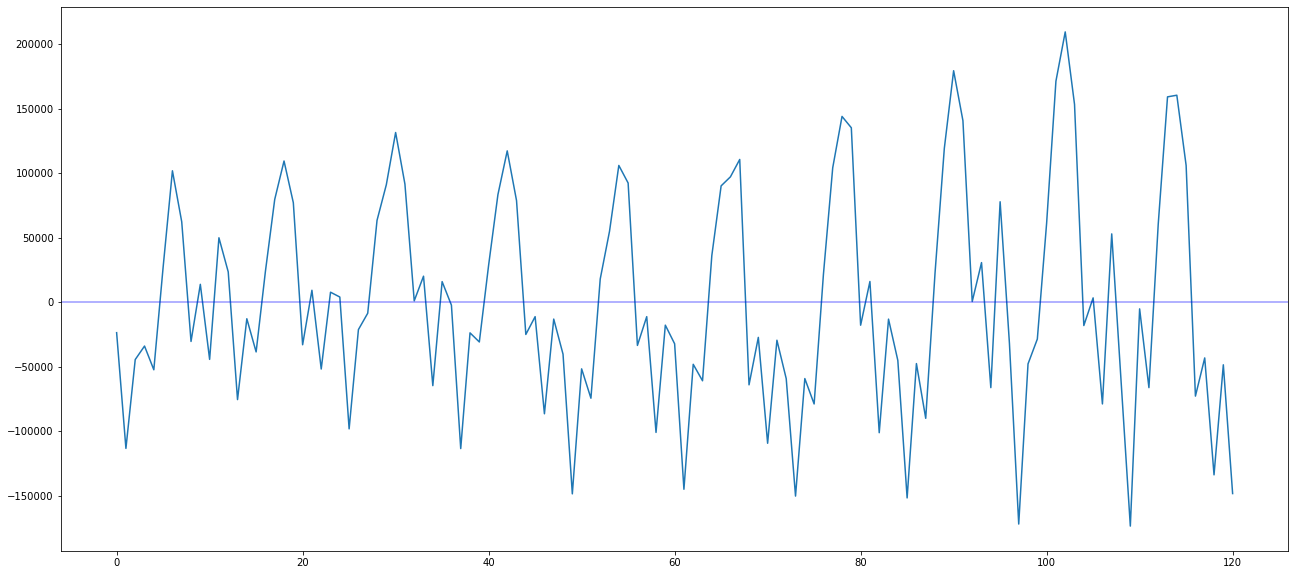

In [25]:
# Write you code here
plt.figure(figsize=(22,10))

lax_totals_post_08_detrd = lax_totals_post_08['Passenger_Count'] - y
plt.plot(x_axe, lax_totals_post_08_detrd)
plt.axhline(y=0, linewidth=2, color='blue', alpha=.3)

* Use the ACF plot to find the highest correation non-zero lag

Highest correlation non-zero lag at 12


D:\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


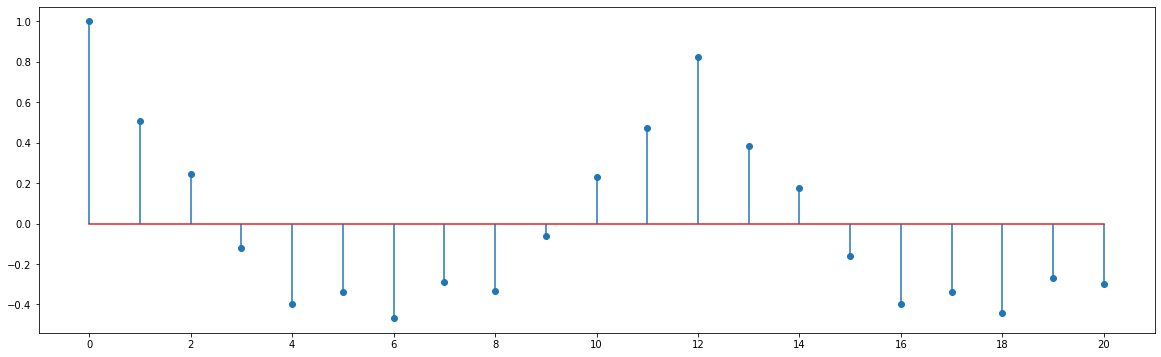

In [26]:
# Write you code here

plt.figure(figsize=(20,6))

acf_v_noise = acf(lax_totals_post_08_detrd,  nlags=20)
plt.stem(np.arange(len(acf_v_noise)), acf_v_noise)
plt.xticks(np.arange(0,22,2))
print(f"Highest correlation non-zero lag at 12")

* Rather manually and iteratively finding all the harmonics in the signal, we will use the code below, which fits a signal using a user defined `n_harm` number of harmonincs. For instance, the fitted signal using 1, 3, 5, 10 harmonics is giving below.

<img src="images/harmonics.png" alt="drawing" style="width:1000px;"/>

* I computed the graph above using code I obtained from the following gist:
https://gist.github.com/tartakynov/83f3cd8f44208a1856ce

In [27]:
import numpy as np
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict=0, n_harm=1):
    n = x.size
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

While using a large number of harmonics improves the fits but leads to a very poor forecasting power -- this is referred to as overfitting. We will cover overfitting in more detail in future sessions. 

We suspect that perhaps the data is not stationary. To quickly test this, we can compute the mean and variance of the data for the first half and the second half of the data. 


In [28]:
print(lax_totals_post_08_orig_detrd[0:62].mean())
print(lax_totals_post_08_orig_detrd[62:].mean())

NameError: name 'lax_totals_post_08_orig_detrd' is not defined

The means are largely different across the first half and the second half. This means that the variability across both subsets don't have the same parameters, indicating that the data is non-stationary, i.e. not exhibiting the same behavior all over. Recall that we said that non-stationary data is difficult to model and forecast using line-fitting. Modeling this date will require fitting two models that cover the different behaviors observed. This makes sense since one model can accommodate the different distributions contained across different time subsets.

Instead of modeling the data using a line, you could use triple exponential smoothing (.i.e., exponential smoothing with trend and seasonality added). This method, which was originally part of this assignment was removed and will be covered in class instead.

